In [ ]:
!pip install -U retinaface_pytorch > /dev/null

In [ ]:
!wget -O crowd.jpg https://habrastorage.org/webt/tj/gk/ch/tjgkch5v0x-tubycgzp3pfbrtas.jpeg > /dev/null

--2024-11-01 11:17:48--  https://habrastorage.org/webt/tj/gk/ch/tjgkch5v0x-tubycgzp3pfbrtas.jpeg
Resolving habrastorage.org (habrastorage.org)... 65.109.153.168, 65.21.120.121, 95.217.107.12, ...
Connecting to habrastorage.org (habrastorage.org)|65.109.153.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 449354 (439K) [image/jpeg]
Saving to: ‘crowd.jpg’

crowd.jpg           100%[===================>] 438.82K   468KB/s    in 0.9s    

2024-11-01 11:17:51 (468 KB/s) - ‘crowd.jpg’ saved [449354/449354]



In [ ]:
import cv2

In [ ]:
from matplotlib import pyplot as plt
from retinaface.pre_trained_models import get_model
from retinaface.utils import vis_annotations

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
plt.rcParams["figure.figsize"] = (15, 15)

In [ ]:
image = cv2.imread("crowd.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
print(image.shape)

(810, 1440, 3)


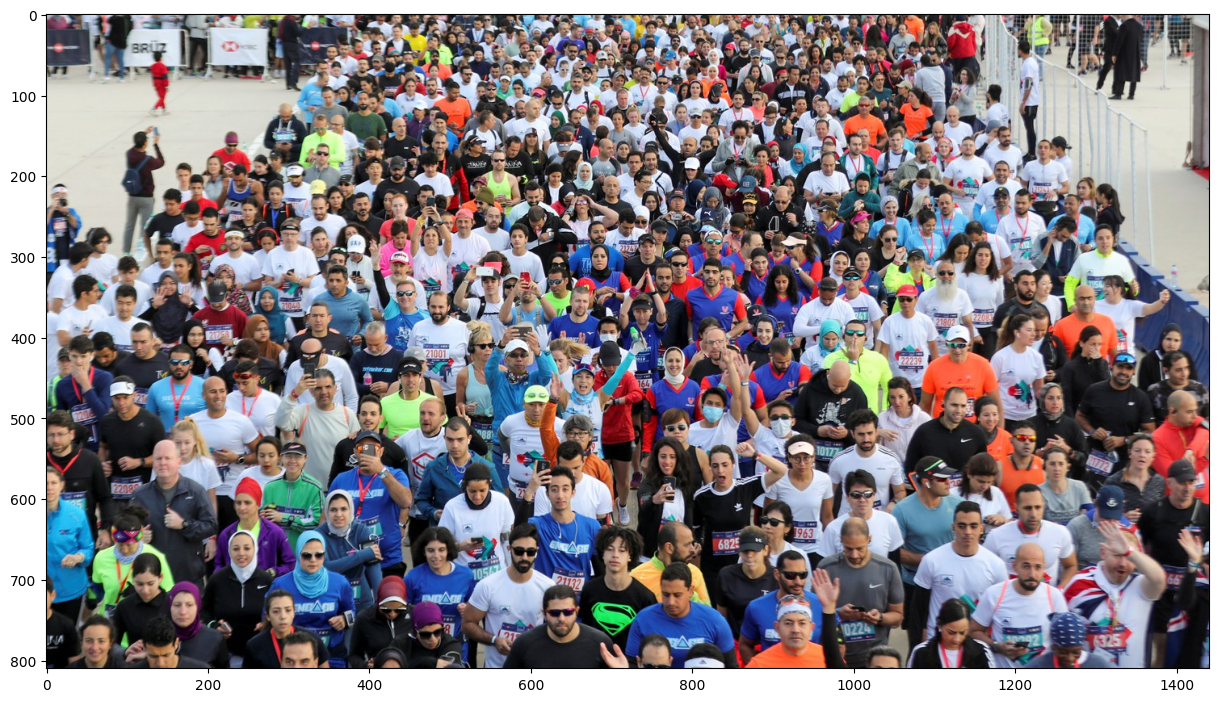

In [ ]:
plt.imshow(image)

In [ ]:
model = get_model("resnet50_2020-07-20", max_size=2048)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://github.com/ternaus/retinaface/releases/download/0.01/retinaface_resnet50_2020-07-20-f168fae3c.zip" to /root/.cache/torch/hub/checkpoints/retinaface_resnet50_2020-07-20-f168fae3c.zip
100%|██████████| 96.9M/96.9M [00:01<00:00, 52.8MB/s]
/usr/local/lib/python3.10/dist-packages/torch/hub.py:870: FutureWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it i

In [ ]:
model.eval()

In [ ]:
annotation = model.predict_jsons(image)

In [ ]:
print(annotation)

[{'bbox': [907, 738, 945, 783], 'score': 0.9996905326843262, 'landmarks': [[919, 755], [936, 754], [928, 763], [920, 772], [934, 772]]}, {'bbox': [1155, 484, 1179, 513], 'score': 0.9992523789405823, 'landmarks': [[1164, 496], [1174, 496], [1170, 502], [1165, 506], [1173, 506]]}, {'bbox': [45, 759, 78, 801], 'score': 0.9992258548736572, 'landmarks': [[53, 776], [69, 775], [60, 785], [54, 790], [69, 790]]}, {'bbox': [760, 701, 795, 744], 'score': 0.9992156028747559, 'landmarks': [[766, 719], [782, 719], [772, 730], [769, 734], [782, 735]]}, {'bbox': [651, 345, 672, 371], 'score': 0.9991714954376221, 'landmarks': [[658, 354], [667, 355], [663, 360], [658, 364], [665, 365]]}, {'bbox': [755, 316, 774, 343], 'score': 0.9991455078125, 'landmarks': [[760, 327], [770, 326], [766, 332], [762, 336], [769, 336]]}, {'bbox': [618, 723, 656, 768], 'score': 0.9990824460983276, 'landmarks': [[629, 741], [645, 740], [637, 751], [631, 758], [644, 757]]}, {'bbox': [348, 319, 369, 346], 'score': 0.99904841

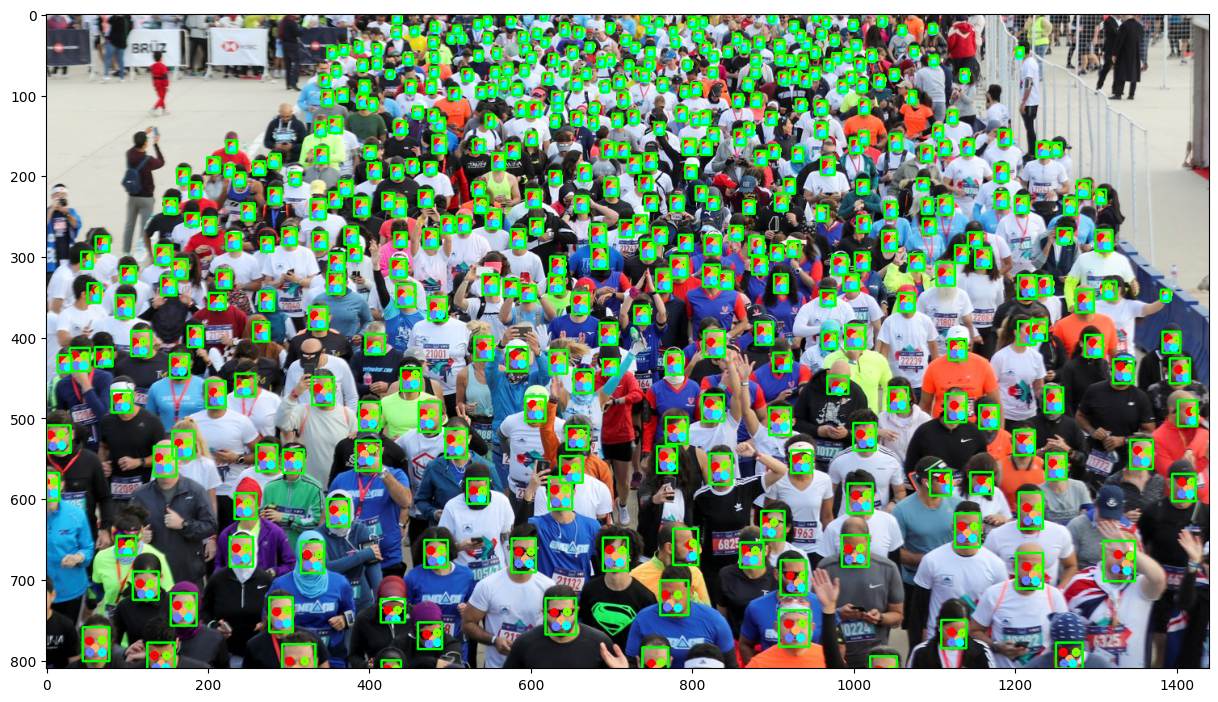

In [ ]:
plt.imshow(vis_annotations(image, annotation))